# JupyLabBook @ SIRIUS

In [1]:
import CustomFunctions as CF
import FrontendFunctions as FF
import PyNexus as PN

print("Versions of modules used:")
print("CustomFunctions: %s"%CF.__version__)
print("FrontendFunctions: %s"%FF.__version__)
print("PyNexus: %s"%PN.__version__)
print("Check that you are using the last versions of the modules and read the manual on: \n%s"%"https://github.com/ArnaudHemmerle/JupyLabBook")

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
if 'is_HR' in locals():
    # Used to generate a high-resolution PDF
    set_matplotlib_formats('png', 'pdf')

Versions of modules used:
CustomFunctions: 0.2
FrontendFunctions: 0.2
PyNexus: v4.1
Check that you are using the last versions of the modules and read the manual on: 
https://github.com/ArnaudHemmerle/JupyLabBook


In [32]:
class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment only.
    """
    def __init__(self):
        pass
    
    
expt = Experiment() 

# Necessary for saving in pdf
expt.notebook_name = 'Example.ipynb'

# Directory where the data will be saved
expt.working_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/working/"

# Directory where the nexus files are 
expt.recording_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/"

# Directory where the logs are
expt.logs_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/logs/"   


expt.wavelength = 0.155 # in nm
expt.thetac = 0.0028 # in rad

expt.moytocreate=(10, 20, 40)
expt.binsize=10
expt.nblevels=50

In [3]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
FF.Create_form()

Text(value='', description='Experiment title:', layout=Layout(height='40px', width='800px'), placeholder='Titl…

----------------------------------------------------------------------------------------------------


Text(value='', description='Users (on site):', layout=Layout(height='40px', width='800px'), placeholder='Names…

----------------------------------------------------------------------------------------------------


Text(value='', description='Recording directory:', layout=Layout(height='40px', width='800px'), placeholder='F…

Machine:


Optics:


Beam:


Monitors and XBPM:


Textarea(value='', description='Detectors:', layout=Layout(height='40px', width='800px'), placeholder='Type of…

Remarks:


Textarea(value='', description='Remarks:', layout=Layout(height='40px', width='800px'), placeholder='Remarks',…

Button(description='Print form', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Form

$\LARGE \textbf{SIRIUS Beamline}:\textbf{Experiment 1234}$

$\Large \color{red}{\bf Confined\ at\ home}$

* Type: Proposal
* Safety: Red
* Date: 13/03/2020-11/05/2020

* Main proposer: Hemmerle
* Local contact: Arnaud
* Users (on site): Person A; Person B
* Recording directory: /Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/

* Machine:
	 * Current: 450 mA
	 * Mode: Hybrid

* Optics:
	 * DCM: Si111
	 * MGM: Not used
	 * M1: M1-A Pt Track
	 * M2: M2 Pt Track
	 * M3: No M3
	 * M4: M4 Pt Track

* Beam:
	 * Fixed/Variable energy: Fixed
	 * Energy (keV): 8
	 * Wavelength (nm): 0.155
	 * Harmonic: 19
	 * Polarisation: LH
	 * Phase (deg): 0
	 * Horizontal focalisation False
	 * Vertical focalisation True
	 * Horizontal beamsize (mm): 0.1

* Monitors and XBPM:
	 * mon1: 
	 * mon2: thick diamond
	 * mon3: 
	 * mon4: 
	 * Detectors: Pilatus

* Remarks: This a nice experiment.

# Beamline alignment

## Scan 654 -> 680 : DCM Alignment 8keV + HU36 + M1 + M2

- Incidence : $$\frac{786-558}{2 \times 2069} \times 0.0355 = 1.9mrad$$

In [6]:
expt.thetai = 0.0019

## Alignment diffracto

In [5]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  (Vertical) SIRIUS_2020_03_11_0744: dscan basez -.2 .2 50 .1


In [7]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

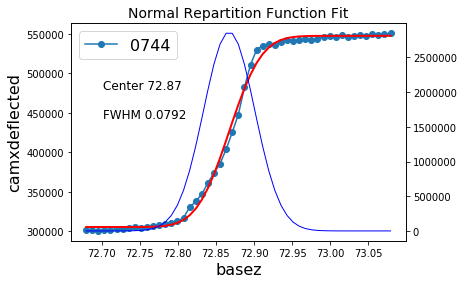

In [8]:
CF.GaussianRepartition_fit(nxs_filename='SIRIUS_2020_03_11_0744.nxs', recording_dir = expt.recording_dir,xLabel='basez', yLabel='camxdeflected')

In [9]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  (Horizontal) SIRIUS_2020_03_11_0749: %sigmoid_dscan basex -.5 .5 100 .1


In [10]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

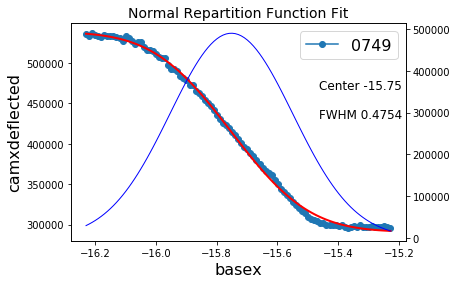

In [11]:
CF.GaussianRepartition_fit(nxs_filename='SIRIUS_2020_03_11_0749.nxs', recording_dir = expt.recording_dir,xLabel='basex', yLabel='camxdeflected')

### Scan 750 -> 752 : Alignment delta angle (Pilatus+Soller)

In [12]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

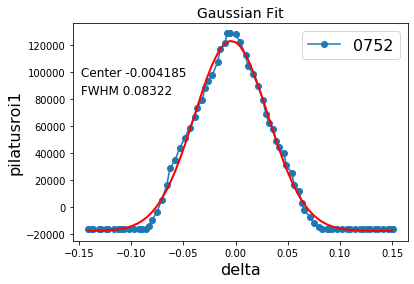

In [14]:
CF.Gaussian_fit(nxs_filename='SIRIUS_2020_03_11_0752.nxs', recording_dir = expt.recording_dir,xLabel='delta', yLabel='pilatusroi1')

In [15]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Calibration thetaz

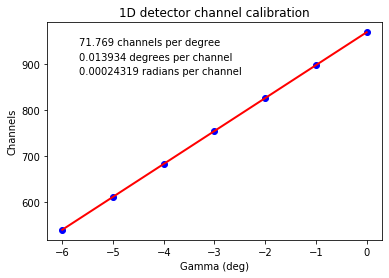

In [16]:
calib_thetaz_data=np.array([
# gamma  channel
[0,      970],
[-1,     899],
[-2,     827],
[-3,     755],
[-4,     683],
[-5,     611],
[-6,     539],
])
expt.thetazfactor=CF.Calib_thetaz(calib_thetaz_data)

# Octadecanol (calibration)

In [17]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0756: continuous_ascan delta -24 -19 100 5


In [18]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

 - Open Nexus Data File :
	/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/SIRIUS_2020_03_12_0756.nxs
	. Number of data points:  101
	. Available Counters:
		 0  ------->  delta
		 1  ------->  zs
		 2  ------->  gamma
		 3  ------->  hu36energy
		 4  ------->  xs
		 5  ------->  energydcm
		 6  ------->  current
		 7  ------->  mon2
		 8  ------->  surfacepressure
		 9  ------->  areapermolecule
		 10  ------->  qxy
		 11  ------->  pilatus
		 12  ------->  pilatusroi1
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Pilatus data found, (column 11, alias pilatus)
	. qxy data found, (column 10, alias qxy)
	. Surface pressure data found, mean value 19.74 ± 0.006119 mN/m
	. Area per molecule data found, mean value 0.3557 ± 3.944e-05 nm2 per molecule
	. Gamma motor data found, mean value -0.0004471 deg


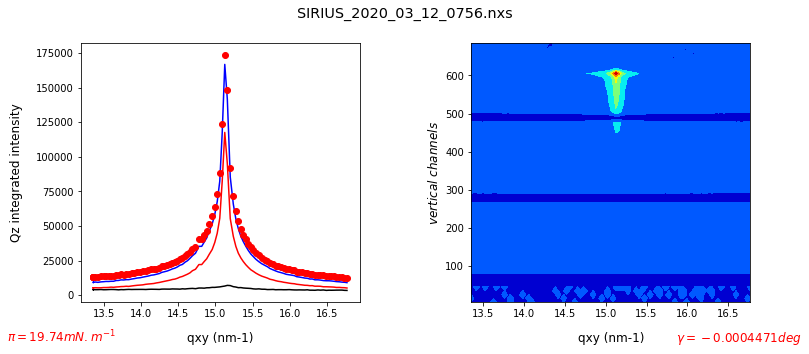

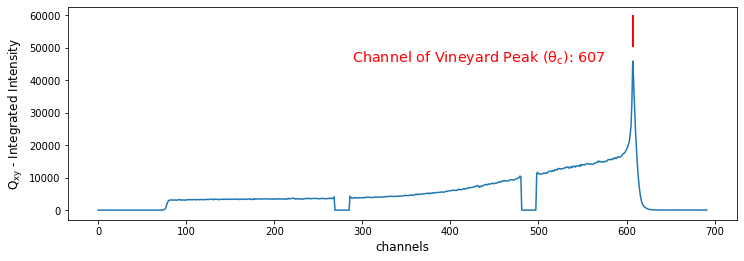

Data not saved. To save data, run a GIXD on the scan.
Channel0: 607


In [19]:
expt.channel0 = CF.Extract_channel_Qc(nxs_filename='SIRIUS_2020_03_12_0756.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logx=False, logy=False, logz=False)

# Scans

## Sample A

In [20]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_Isotherm_2019_02_17_01544: isotherm 1.97 46 35000 1


In [21]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

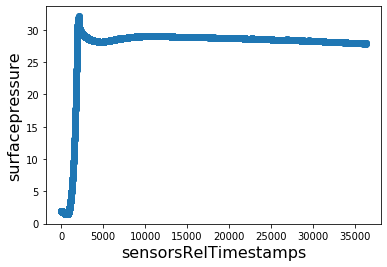

In [23]:
CF.Plot_1D(nxs_filename='SIRIUS_Isotherm_2019_02_17_01544.nxs', recording_dir=expt.recording_dir,xLabel='sensorsRelTimestamps', yLabel='surfacepressure')

 - Open Nexus Data File :
	/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/SIRIUS_Isotherm_2019_02_17_01544.nxs
	. Number of data points:  35001
	. Area per molecule found column 1
	. Surface pressure per molecule found column 2
	. Time per molecule found column 4
	. Valuable data between points 0 and 35000


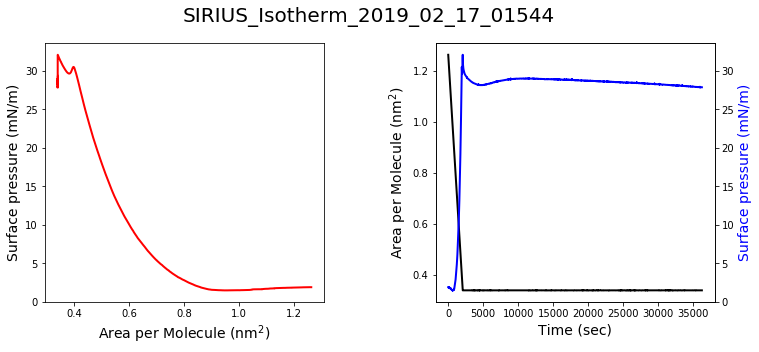

In [22]:
CF.Plot_isotherm(nxs_filename='SIRIUS_Isotherm_2019_02_17_01544.nxs', recording_dir=expt.recording_dir,show_data_stamps=False)

In [24]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0760: run cont_regh.ipy


In [25]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

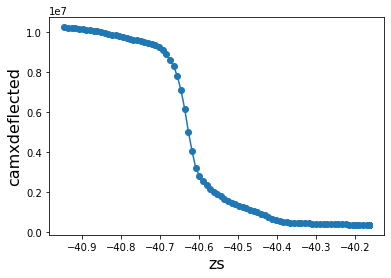

In [27]:
CF.Plot_1D(nxs_filename='SIRIUS_2020_03_12_0760.nxs', recording_dir=expt.recording_dir,xLabel='zs', yLabel='camxdeflected')

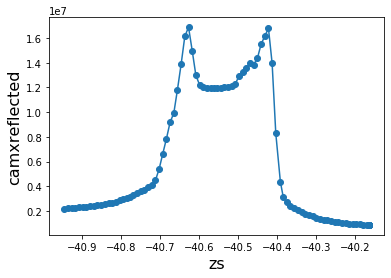

In [26]:
CF.Plot_1D(nxs_filename='SIRIUS_2020_03_12_0760.nxs', recording_dir=expt.recording_dir,xLabel='zs', yLabel='camxreflected')

In [28]:
scan = FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0759: continuous_ascan delta -24 -15 150 5


In [29]:
FF.Choose_treatment(scan, expt)

<IPython.core.display.Javascript object>

 - Open Nexus Data File :
	/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/SIRIUS_2020_03_12_0759.nxs
	. Number of data points:  151
	. Pilatus data found, (column 11, alias pilatus)
	. qxy data found, (column 10, alias qxy)
	. Valuable data between points 0 and 150
	. Surface pressure data found, mean value 4.652 ± 0.002447 mN/m
	. Area per molecule data found, mean value 0.2927 ± 0.0002703 nm2 per molecule
	. Gamma motor data found, mean value 9.009e-05 deg
	. For more details on the geometry, see:                                           
	 	 -Fig.2 in doi:10.1107/S0909049512022017
	 	 -Slide 4 in http://gisaxs.com/files/Strzalka.pdf
	. Data saved in text format


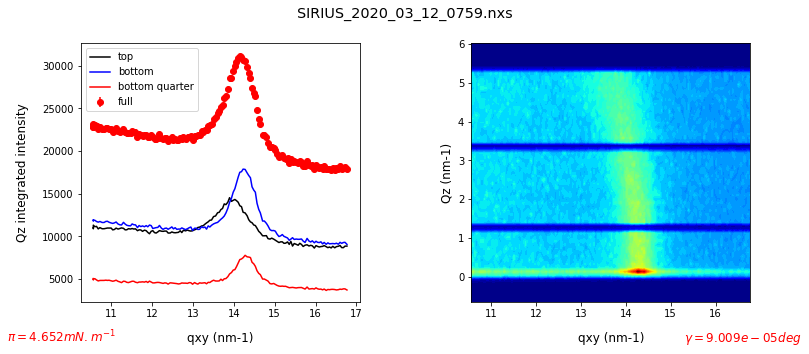

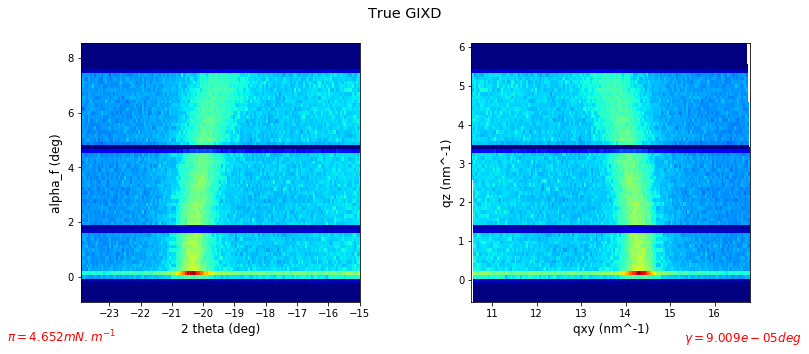

In [30]:
CF.Extract_GIXD(nxs_filename='SIRIUS_2020_03_12_0759.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logx=False, logy=False, logz=False, channel0=expt.channel0, thetazfactor=expt.thetazfactor, wavelength=expt.wavelength, thetac=expt.thetac, thetai=expt.thetai, binsize=expt.binsize, computeqz=True, nblevels=expt.nblevels, moytocreate=expt.moytocreate, show_data_stamps=False, show_saved_data=False, plot_true_GIXD=True)

In [33]:
scan = FF.Choose_action(expt)

interactive(children=(Dropdown(description='nxs_file', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs', 'SIRIU…

Export in progress (it may take a long time)...
